## **Homework 1** Problem 1

In [1]:
%matplotlib inline

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from Canvas and put into your Google Drive.
Mount your Google Drive to this notebook.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive. 

In [3]:
from scipy.io import loadmat
mnist = loadmat('/content/gdrive/My Drive/Colab Notebooks/ee-596/hw-1/mnist.mat')
traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']
testlabels = mnist['testlabels'].ravel()
print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)
print(testlabels.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

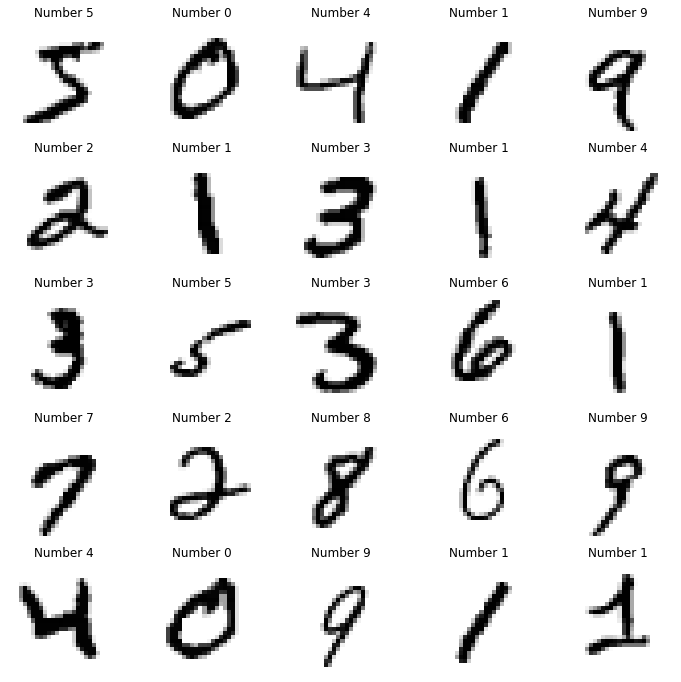

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In order to determine a suitable value for *k < d* I'll graph the cumulative variance explained as a function of the number of components. 

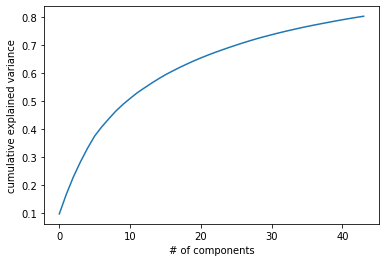

In [6]:
pca = PCA(0.80).fit(traindata)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('cumulative explained variance');

In [7]:
print(f'# Components: {pca.n_components_}')

# Components: 44


The guidance in the homework suggests to keep ~80%. From the plot above we can see that keeping 44 components will satisfy this condition. Next we will transform the train, validation and test datasets.

In [8]:
pca_traindata = pca.transform(traindata)
pca_validdata = pca.transform(validdata)
pca_testdata = pca.transform(testdata)

**Please type your answers for the discussion questions here.**

## **Homework 1** Problem 2

### (a) $k$-Nearest Neighbor Classifier (Supervised Learning)

Implement the $k$-nearest neighbor classifier with Euclidean distance on the MNIST dataset.


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
def knn(traindata, trainlabels, testdata, k=1):
  knn = KNeighborsClassifier(n_neighbors=k) #The default distance metric is the Euclidean distance.
  knn.fit(traindata, trainlabels)
  
  return knn.predict(testdata)  

Evaluate the performance by classification accuracy on validation set with different number of training data.

In [16]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
raw_scores = []

for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)

  # TODO: run k-NN using raw training data
  y_preds = knn(traindata[sel], trainlabels[sel], validdata)
  raw_scores.append(accuracy_score(validlabels, y_preds))


Now let's look at the learning curve for KNN on the raw data.

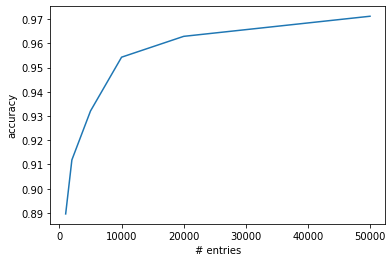

In [17]:
plt.plot(n_entries, raw_scores)
plt.xlabel('# entries')
plt.ylabel('accuracy');

In [18]:
print(f'Scores: {raw_scores}')

Scores: [0.8896, 0.9119, 0.9321, 0.9543, 0.9629, 0.9712]


In [19]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
pca_scores = []

for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)

  # TODO: run k-NN using pca data
  y_preds = knn(pca_traindata[sel], trainlabels[sel], pca_validdata)

  # TODO: evaluate classification accuracy
  pca_scores.append(accuracy_score(validlabels, y_preds))


Draw the learning curve.

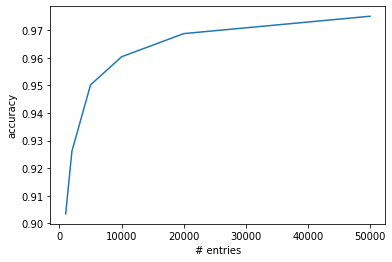

In [20]:
plt.plot(n_entries, pca_scores)
plt.xlabel('# entries')
plt.ylabel('accuracy');

In [21]:
print(f'Scores: {pca_scores}')

Scores: [0.9034, 0.9261, 0.9502, 0.9604, 0.9688, 0.9751]


Evaluate the classification accuracy with different hyperparamter $k$.

In [22]:
k_params = range(1, 26)
kparam_scores = []

for k in k_params:
  y_preds = knn(pca_traindata, trainlabels, pca_validdata, k)
  kparam_scores.append(accuracy_score(validlabels, y_preds))

Now let's graph the hyperparameters *k* vs the accruacy score in order to determin the optimal value.

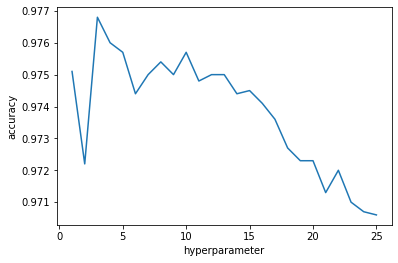

In [23]:
plt.plot(k_params, kparam_scores)
plt.xlabel('hyperparameter')
plt.ylabel('accuracy');

In [24]:
print(f'Scores: {kparam_scores}')

Scores: [0.9751, 0.9722, 0.9768, 0.976, 0.9757, 0.9744, 0.975, 0.9754, 0.975, 0.9757, 0.9748, 0.975, 0.975, 0.9744, 0.9745, 0.9741, 0.9736, 0.9727, 0.9723, 0.9723, 0.9713, 0.972, 0.971, 0.9707, 0.9706]


**Explanation:** From the graph and print out of the scores above we can see that a value of *k=3* provides an accuracy of of 97.68%, which is higher than all other values of *k*. While our score is decent the value of *k* doesn't have too much of an impact on the accuracy up or down. I belive this is because we are still dealing with a high dimensional space (44 features). 

Lastly, we run the model on the test set and display its accuracy.

In [25]:
y_test_preds = knn(pca_traindata, trainlabels, pca_testdata, 4)
acc = accuracy_score(testlabels, y_test_preds);

In [26]:
print(f'Test Accuracy: {acc*100}%')

Test Accuracy: 97.31%


**Please type your answers for the discussion questions here.**

### (b) $k$-means Clustering (Unsupervised Learning)

Implement $k$-Means clustering algorithm and report classification accuracies.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sns


def derive_labels(kmeans, true_labels):
  data_labels = np.zeros(kmeans.n_clusters)
  
  for i in range(kmeans.n_clusters):
    index = np.where(kmeans.labels_ == i)
    counts = np.bincount(true_labels[index])
    data_labels[i] = np.argmax(counts)

  return [data_labels[i] for i in kmeans.labels_]

In [27]:
n_cluster = 10

# TODO: fit kmeans model
kmeans_clf = KMeans(n_clusters=n_cluster)
kmeans_clf.fit(pca_traindata);

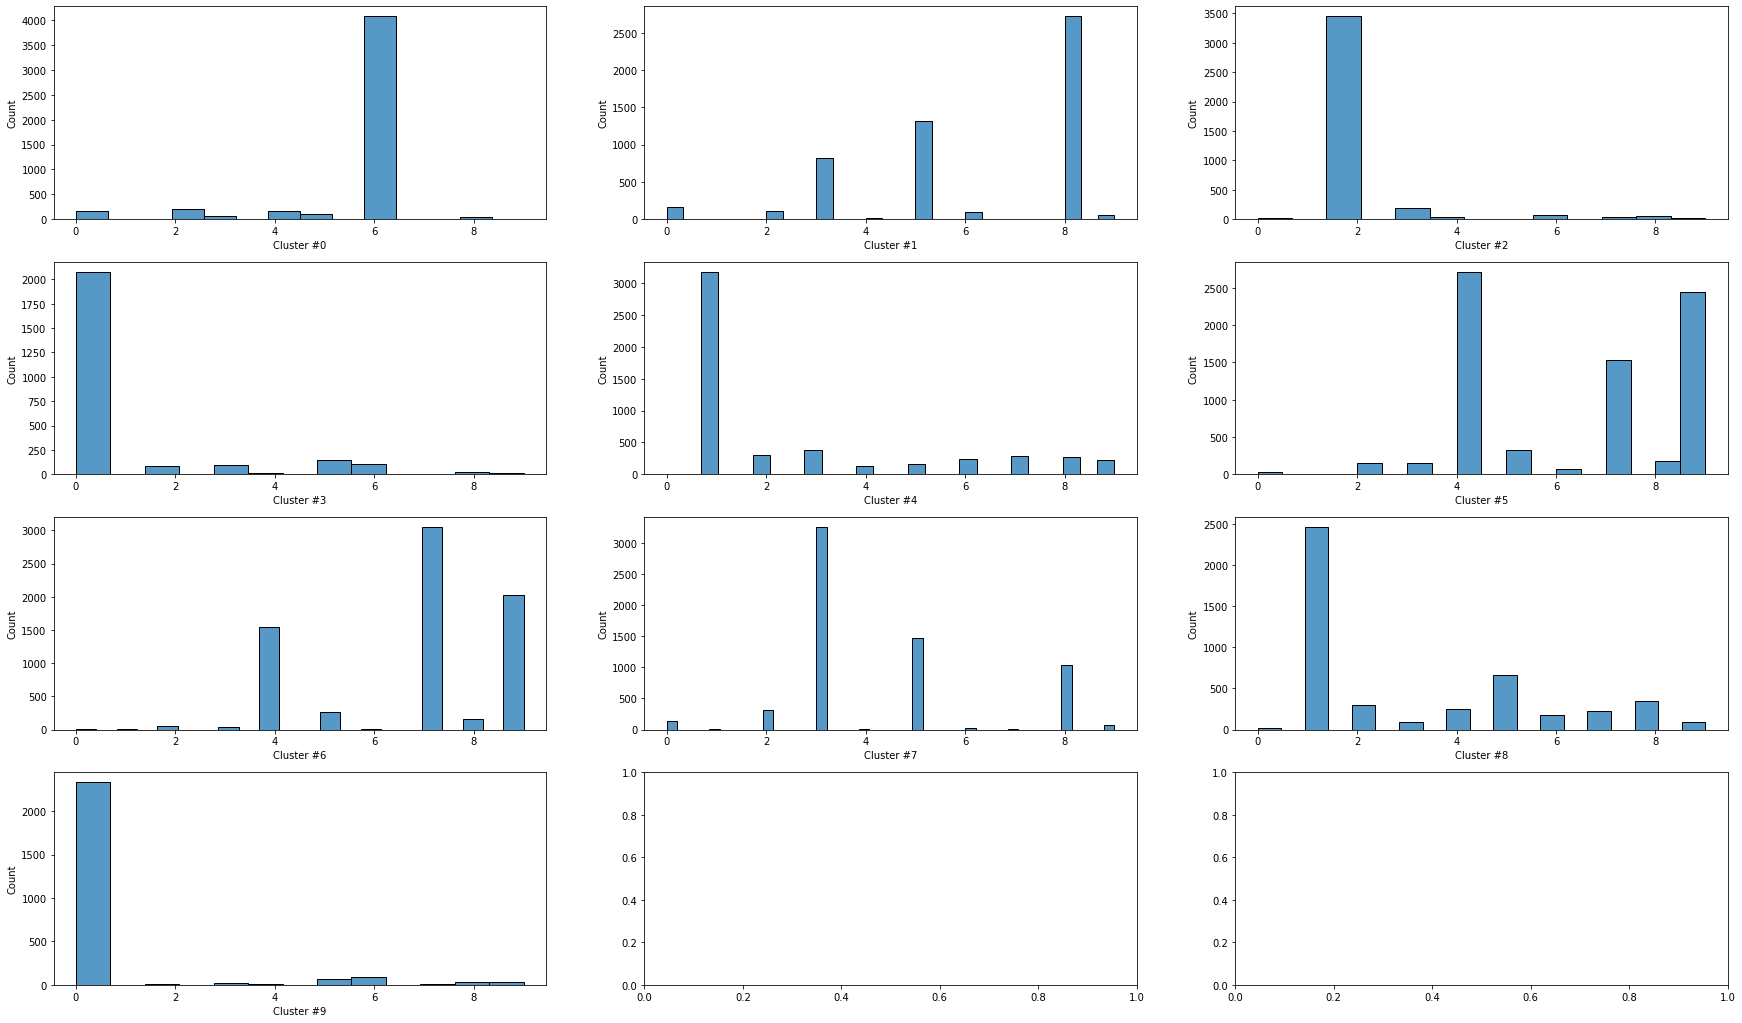

In [28]:
# TODO: show real digit distribution in each cluster
fig, ax = plt.subplots(4, 3, squeeze=True, figsize=(30, 18))
for i, subplot in zip(range(kmeans_clf.n_clusters), ax.flatten()):
  index = np.where(kmeans_clf.labels_ == i)
  ax = sns.histplot(trainlabels[index], ax=subplot)
  ax.set(xlabel=f'Cluster #{i}')

In [29]:
# TODO: evaluate accuracy
y_kmeans_preds = derive_labels(kmeans_clf, trainlabels)
acc = accuracy_score(trainlabels, y_kmeans_preds)

print(f'Test Accuracy: {round(acc*100,2)}%')

Test Accuracy: 58.64%


**Explanation**: Why is the performance of k = 10 not good? At least one reason why the prediction is not very good is that the KMeans with 10 clusters is not picking up 5 or 9. Additionally, amongst the digits it has identified there appears to be some variation in style that it's not picking up.

Improve the clustering performance by using different $k$ and adding splitting and grouping strategies.

In [12]:
clusters = [10, 16, 36, 64, 144, 256]

1. Try different cluster sizes with KMeans

In [ ]:
for n in clusters:
    estimator = KMeans(n_clusters=n)
    estimator.fit(pca_traindata)

    prediction = derive_labels(estimator, trainlabels)

    print(f'Number of Clusters: {n}')
    print(f'Accuracy: {round(accuracy_score(trainlabels, prediction)*100, 2)}%\n')

Number of Clusters: 10
Accuracy: 58.67%

Number of Clusters: 16
Accuracy: 68.15%

Number of Clusters: 36
Accuracy: 77.45%

Number of Clusters: 64
Accuracy: 82.61%

Number of Clusters: 144
Accuracy: 88.93%

Number of Clusters: 256
Accuracy: 91.68%



2. Try different hierarchial clustering, merging and splitting, strategies with different cluster sizes

In [15]:
from sklearn.cluster import AgglomerativeClustering

for n in clusters:
  for l in ['ward', 'complete', 'average', 'single']:
    estimator = AgglomerativeClustering(n_clusters=n,linkage=l)
    estimator.fit(pca_traindata)

    prediction = derive_labels(estimator, trainlabels)

    print(f'Number of Clusters: {n}')
    print(f'Linkage: {l}')
    print(f'Accuracy: {round(accuracy_score(trainlabels, prediction)*100, 2)}%\n')

Number of Clusters: 10
Linkage: ward
Accuracy: 68.9%

Number of Clusters: 10
Linkage: complete
Accuracy: 36.77%

Number of Clusters: 10
Linkage: average
Accuracy: 27.94%

Number of Clusters: 10
Linkage: single
Accuracy: 11.37%

Number of Clusters: 16
Linkage: ward
Accuracy: 74.38%

Number of Clusters: 16
Linkage: complete
Accuracy: 45.93%

Number of Clusters: 16
Linkage: average
Accuracy: 30.39%

Number of Clusters: 16
Linkage: single
Accuracy: 11.39%

Number of Clusters: 36
Linkage: ward
Accuracy: 85.24%

Number of Clusters: 36
Linkage: complete
Accuracy: 52.67%

Number of Clusters: 36
Linkage: average
Accuracy: 43.89%

Number of Clusters: 36
Linkage: single
Accuracy: 11.43%

Number of Clusters: 64
Linkage: ward
Accuracy: 88.75%

Number of Clusters: 64
Linkage: complete
Accuracy: 58.75%

Number of Clusters: 64
Linkage: average
Accuracy: 64.75%

Number of Clusters: 64
Linkage: single
Accuracy: 11.48%

Number of Clusters: 144
Linkage: ward
Accuracy: 92.58%

Number of Clusters: 144
Linka

**Question:** Can you improve the accuracy in question 2)? Yes, by increasing the number of clusters and using AgglomerativeClustering using ward linkage I was able to achieve an accuracy of 93.52% with 256 clusters.

Infer $k$-Means results on the testing set. Evaluate performance.

In [30]:
test_kmeans = KMeans(n_clusters=256)
test_kmeans.fit(pca_testdata)
    
y_test_preds = derive_labels(test_kmeans, testlabels)

print(f'Test Accuracy: {round(accuracy_score(testlabels, y_test_preds)*100, 2)}\n')

Test Accuracy: 91.48



**Please type your answers for the discussion questions here.**

### (c) Discussion

1. List the differences between supervised and unsupervised learning algorithms?

*   The defining difference between the two groups of algorithms is that supervised learning uses known labels/responses to learn the relation between the predictors and the label. Unsupervised learning does not use labels.
*   Since unsupervised learning doesn't use a response variable such algorithms work to the understand the relationships between the variables or observations.One such tool towards describing such relationships is cluster analysis.
* Only supervised learning techniques can be used on regression problems.
* Typically the goal of supervised learning is to predict an outcome and for unsupervised learning the goal to gather insights.


---



2. How to choose hyperparameters for a machine learning algorithm? There are a few different techniques that one could use to select optimal hyperparameters.

* Talk to an expert in the area you're working in. That person my have solid values for you to use cause they've tried everything. 
* Iterate through every possible set of hyperparameters.
* Randomly select values from the possible set of reasonable configurations.
* [Bayesian Optimization](https://en.wikipedia.org/wiki/Bayesian_optimization)
* [Hill Climbing](https://en.wikipedia.org/wiki/Hill_climbing)






**Please type your answers for the discussion questions here.**